# Titanic Data Analysis

## 从性别, 年龄, Embarked, Pclass四个方面分析生还情况

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)

In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 由上述info可知, 年龄Age的缺失值较多, 故采用dropna方法删除缺失值

In [37]:
clean_age_titanic_df = titanic_df['Age'].dropna()
len(clean_age_titanic_df)

714

#  生还情况分析

## 总生还率

In [26]:
survived_rate = titanic_df['Survived'].mean()
survived_rate

0.3838383838383838

## 按性别划分生还情况

### 生还人数

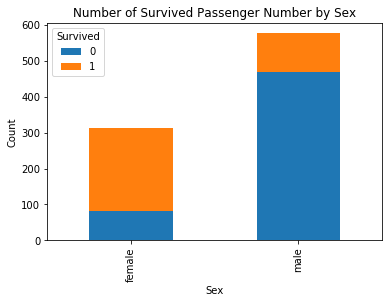

In [27]:
# 构建绘制人数的堆柱形图
def survival_count(key):
    titanic_df.groupby([key,'Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)
    plt.ylabel('Count')
    plt.title('Number of Survived Passenger Number by {}'.format(key))
# 调用 
survival_count('Sex')

由上图可知:
- 女性大多数生还, 男性大多数死亡
- 可以猜想危险发生时, 大多数男性都积极营救了女性

### 生还率

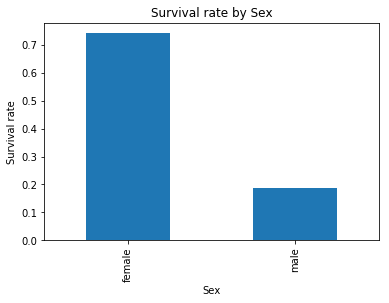

In [28]:
def survival_rate(key):
    titanic_df.groupby(key)['Survived'].mean().plot(kind='bar')
    plt.ylabel('Survival rate')
    plt.title('Survival rate by {}'.format(key))
survival_rate('Sex')

- 女性的生还率是74.2%, 男性的生还率是18.9%
- 女性的生还率高于男性
- 可以猜想危险发生时, 大多数男性都积极营救了女性

## 按年龄划分生还情况

In [ ]:
bins=np.arange(0,90,10)
titanic_df['Age_group'] = pd.cut(clean_age_titanic_df, bins)

### 生还人数

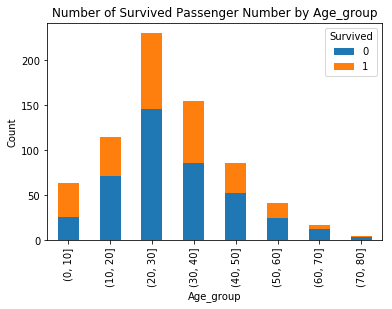

In [32]:
survival_count('Age_group')

由上图可以看出:
- (20, 30] (30, 40]岁的生还人数最多
- 60岁以上的生还人数极少

### 生还率

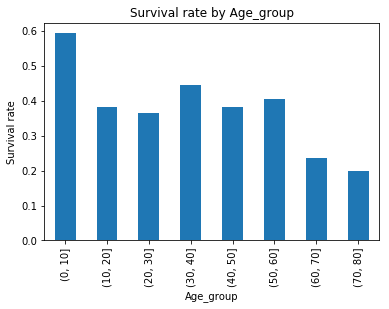

In [31]:
survival_rate('Age_group')

由上图可以看出:
- (0,10] 岁的生还率最高, 60岁以上的生还率最低
- 可以猜想在危险发生时, Titanic号上的年轻人和中年人积极营救了儿童
- 60岁老人因为行动不便等因素生还率最低

## 按登船地点(Embarked)划分生还人数

### Port of Embarkation: C

([<matplotlib.patches.Wedge at 0xa11a208>,
 [<matplotlib.text.Text at 0xa11a710>, <matplotlib.text.Text at 0xa12b3c8>],
 [<matplotlib.text.Text at 0xa11aa90>, <matplotlib.text.Text at 0xa12b6d8>])

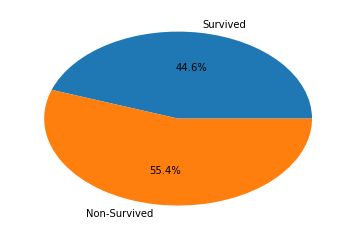

In [8]:
by_Embarked = titanic_df.groupby(['Survived','Embarked'])['Survived'].count().unstack()
plt.pie(by_Embarked['C'], labels=['Survived', 'Non-Survived'], autopct='%.1f%%')

### Port of Embarkation: Q

([<matplotlib.patches.Wedge at 0xa25f358>,
 [<matplotlib.text.Text at 0xa25f898>, <matplotlib.text.Text at 0xa26c4e0>],
 [<matplotlib.text.Text at 0xa25fba8>, <matplotlib.text.Text at 0xa26c7f0>])

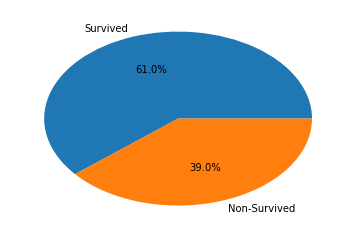

In [9]:
plt.pie(by_Embarked['Q'], labels=['Survived', 'Non-Survived'], autopct='%.1f%%')

### Port of Embarkation: S

([<matplotlib.patches.Wedge at 0xaaf86d8>,
 [<matplotlib.text.Text at 0xaaf8c18>, <matplotlib.text.Text at 0xab07860>],
 [<matplotlib.text.Text at 0xaaf8f28>, <matplotlib.text.Text at 0xab07b70>])

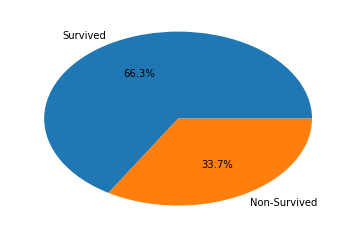

In [10]:
plt.pie(by_Embarked['S'], labels=['Survived', 'Non-Survived'], autopct='%.1f%%')

综上：
- C口上船的人死亡人数多于生还人数
- Q口和S口上船的生还人数多于死亡人数

## 按照Pclass划分生还情况

### 生还人数

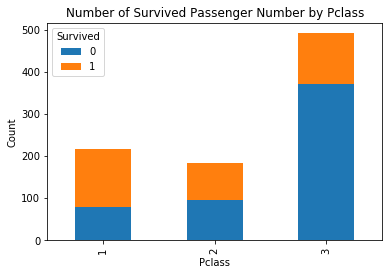

In [33]:
survival_count('Pclass')

由上图可知:
- Pclass 1的生还人数大于死亡人数; Pclass 2基本持平; Pclass 3的生还人数远小于死亡人数

### 生还率

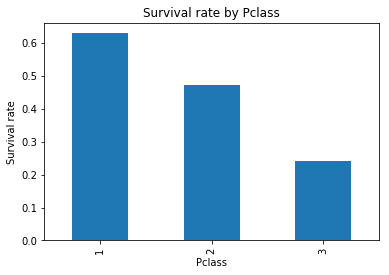

In [34]:
survival_rate('Pclass')

由上图可知:
- 一等舱的生还率最高, 二等舱稍低, 三等舱最低
- 可以猜想危险发生时, 船上的救援方案是优先疏散高等级舱的乘客安全

## 总结

1. 样本数量为891, 足以说明问题
2. 数据集中年龄存在较多缺失值, 我的处理方式是删除缺失值。删除后缺失值后仍有714个年龄, 对分析影响不大
3. 如果有条件, 可以增加变量:获救时间, 即发生事故到最后被营救的时间, 这个变量应该与生还率密切相关
4. 未采用统计检验, 故对结论的显著性有影响
5. 数据分析只能够分析出相关性，并不能得出因果性。